In [2]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as pl
import seaborn as sns

sns.set()
%matplotlib inline

In [3]:
## Reading Dataset
teams = pd.read_csv('master_team_list.csv')
players = pd.read_csv('cleaned_merged_seasons.csv')

C:\Users\TECHNO\AppData\Local\Temp/ipykernel_9892/3014926019.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('cleaned_merged_seasons.csv')


In [13]:
teams.head()

,season,team,team_name
0,2016-17,1,Arsenal
1,2016-17,2,Bournemouth
2,2016-17,3,Burnley
3,2016-17,4,Chelsea
4,2016-17,5,Crystal Palace


In [6]:
teams.tail()

,season,team,team_name
135,2022-23,16,Nott'm Forest
136,2022-23,17,Southampton
137,2022-23,18,Spurs
138,2022-23,19,West Ham
139,2022-23,20,Wolves


season_x: Represents the season to which the game week belongs. It helps distinguish data from different seasons.

Name: Refers to the name of the player who performed in the game week.

Position: Determines the player's position on the field (e.g. goalkeeper, defender, midfielder, striker).

team_x: indicates the player's team for the match week.

Assists: represents the number of goals scored by the player in the week of the match.

Bonus: Refers to any additional points awarded to the player based on his performance.

bps (Bonus Points System): A points system used in Fantasy Premier League to calculate bonus points for players based on their overall performance in a match.

Clean sheets: represents the number of matches in which the player's team did not concede any goals.

Creativity: A metric that measures a player's ability to create scoring opportunities for his team.

Item: Indicates the unique identifier of a player in Fantasy Premier League.

Match: Provides information about the player's next match (opposing team and location).

goal_conceded: represents the number of goals conceded by the player's team in the match week.

goal_scored: indicates the number of goals scored by the player in the match week.

ict_index (Influence, Creativity, Threat): An index that combines multiple factors to measure a player's overall impact on the game.

Influence: Represents the player's level of influence in the week of the match.

Kick_time: Specifies the time at which the game started.

Minutes: Refers to the number of minutes the player played in the match week.

opponent_team: Indicates the unique identifier of the opposing team.

opp_team_name: Indicates the name of the opposing team.

own_goals: represents the number of goals scored by the player against his team (unintentionally).

Missed Penalty Kicks: Refers to the number of penalty kicks missed by the player in the week of the match.

Penalties_saved: represents the number of penalty kicks saved by the player (if goalkeeper) in the match week.

red_cards: indicates the number of red cards the player received in the match week.

Round: Represents the game week number.

Saves: Determines the number of shots on goal that a player (if a goalkeeper) saves in a match week.

Selected: Represents the number of Fantasy Premier League managers who have selected the player in their team.

team_a_score: Refers to the away team's score in the match week.

team_h_score: Refers to the score of the home team in the match week.

Threat: A metric that measures the level of threat a player poses to the opponent's goal.

Total_points: represents the total number of points earned by the player in the game week.

Transfer_balance: indicates the net number of transfers made by the player in the match week.

Transfers_in: Represents the number of transfers that brought the player to Fantasy Premier League teams in the match week.

Transfers_out: Represents the number of transfers that took a player out of Fantasy Premier League teams in the match week.

Value: Represents the player's value in terms of Fantasy Premier League budget.

Was_home: Indicates whether the player's team played home or away during the match week.

Yellow cards: represent the number of yellow cards obtained by the player in the week of the match.

GW: Abbreviation for Game Week.

In [7]:
players.head()

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,1.0,0.0,1,0,0,0,45,True,1,1


In [8]:
players.tail()

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
96164,2022-23,Oliver Skipp,MID,Spurs,0,0,16,0,0.0,441,...,1.0,0.0,2,100,742,642,43,False,0,38
96165,2022-23,Ryan Sessegnon,DEF,Spurs,0,0,0,0,0.0,436,...,1.0,0.0,0,-166,24,190,44,False,0,38
96166,2022-23,Ashley Young,DEF,Aston Villa,0,0,0,0,0.0,538,...,2.0,0.0,0,-1146,1522,2668,43,True,0,38
96167,2022-23,Jeremy Sarmiento Morante,MID,Brighton,0,0,0,0,0.0,119,...,2.0,0.0,0,-17,22,39,45,False,0,38
96168,2022-23,Philip Billing,MID,Bournemouth,0,0,15,0,0.0,70,...,1.0,0.0,2,-18361,736,19097,50,False,0,38


In [9]:
## Exploratory Data

In [18]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   season     140 non-null    object
 1   team       140 non-null    int64 
 2   team_name  140 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.4+ KB


In [13]:
teams.describe()

,season,team,team_name
count,140,140.000000,140
unique,7,NaN,32
top,2016-17,NaN,Arsenal
freq,20,NaN,7
mean,NaN,10.500000,NaN
std,NaN,5.786986,NaN
min,NaN,1.000000,NaN
25%,NaN,5.750000,NaN
50%,NaN,10.500000,NaN
75%,NaN,15.250000,NaN


In [14]:
teams.describe(include=('object'))

,season,team_name
count,140,140
unique,7,32
top,2016-17,Arsenal
freq,20,7


In [15]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96169 entries, 0 to 96168
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           96169 non-null  object 
 1   name               96169 non-null  object 
 2   position           96169 non-null  object 
 3   team_x             76317 non-null  object 
 4   assists            96169 non-null  int64  
 5   bonus              96169 non-null  int64  
 6   bps                96169 non-null  int64  
 7   clean_sheets       96169 non-null  int64  
 8   creativity         96169 non-null  float64
 9   element            96169 non-null  int64  
 10  fixture            96169 non-null  int64  
 11  goals_conceded     96169 non-null  int64  
 12  goals_scored       96169 non-null  int64  
 13  ict_index          96169 non-null  float64
 14  influence          96169 non-null  float64
 15  kickoff_time       96169 non-null  object 
 16  minutes            961

In [16]:
players.describe()

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,GW
count,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,...,96169.000000,96169.000000,96169.000000,96169.000000,9.616900e+04,9.616900e+04,9.616900e+04,96169.000000,96169.000000,96169.000000
mean,0.041042,0.108715,6.080275,0.106739,4.734000,327.063264,198.413824,0.495887,0.045514,1.715793,...,1.265158,1.516393,5.287598,1.379270,1.677100e+03,1.454716e+04,1.286945e+04,51.352390,0.053167,20.772099
std,0.215378,0.492334,9.850595,0.308783,10.689879,194.313766,108.884200,0.974269,0.233644,3.042551,...,1.229086,1.349184,13.368420,2.542535,6.581628e+04,5.725343e+04,4.840128e+04,12.667432,0.224367,10.941742
min,0.000000,0.000000,-21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-7.000000,-2.180978e+06,0.000000e+00,0.000000e+00,37.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,159.000000,105.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,-1.374000e+03,4.600000e+01,1.280000e+02,44.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.000000,203.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,-5.800000e+01,4.380000e+02,1.104000e+03,48.000000,0.000000,22.000000
75%,0.000000,0.000000,10.000000,0.000000,2.400000,486.000000,293.000000,1.000000,0.000000,2.500000,...,2.000000,2.000000,2.000000,2.000000,7.900000e+01,5.042000e+03,7.562000e+03,54.000000,0.000000,30.000000
max,4.000000,3.000000,128.000000,1.000000,170.900000,778.000000,380.000000,9.000000,4.000000,32.800000,...,7.000000,9.000000,186.000000,29.000000,1.983733e+06,2.104464e+06,2.233619e+06,133.000000,1.000000,38.000000


In [17]:
players.describe(include=('object'))

,season_x,name,position,team_x,kickoff_time,opp_team_name
count,96169,96169,96169,76317,96169,96169
unique,5,1327,5,25,1220,31
top,2022-23,Ben Davies,MID,Everton,2023-05-28T15:30:00Z,Crystal Palace
freq,26505,283,39163,4079,778,4818


In [20]:
players.columns

Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW'],
      dtype='object')

In [27]:
players[players['name'].str.startswith('Mohamed S')]

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
8758,2017-18,Mohamed Salah,MID,NaN,1,1,26,0,2.8,234,...,3.0,55.0,11,0,0,0,90,False,0,1
9041,2017-18,Mohamed Salah,MID,NaN,1,0,5,1,16.9,234,...,3.0,57.0,4,210999,246328,35329,92,True,0,10
9329,2017-18,Mohamed Salah,MID,NaN,0,3,48,0,37.6,234,...,1.0,59.0,15,79912,118529,38617,93,False,0,11
9619,2017-18,Mohamed Salah,MID,NaN,0,3,40,1,27.3,234,...,3.0,66.0,16,280935,291072,10137,95,True,0,12
9909,2017-18,Mohamed Salah,MID,NaN,0,0,23,0,26.7,234,...,1.0,88.0,7,116541,153845,37304,96,True,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92202,2022-23,Mohamed Salah,MID,Liverpool,0,3,31,1,31.0,283,...,1.0,44.0,11,133703,244875,111172,130,True,0,34
93109,2022-23,Mohamed Salah,MID,Liverpool,0,2,31,1,40.4,283,...,1.0,54.0,10,135958,177892,41934,130,True,0,35
93896,2022-23,Mohamed Salah,MID,Liverpool,3,0,33,1,52.7,283,...,0.0,48.0,12,76997,105527,28530,131,False,0,36
94767,2022-23,Mohamed Salah,MID,Liverpool,1,0,13,0,21.0,283,...,1.0,64.0,5,-54001,92075,146076,131,True,0,37


In [28]:
## Cleaning data

In [5]:
## Handle missing values

# Identify the players with missing team information
players_with_missing_team = players[players["team_x"].isnull()]["name"].unique()

# Filter the DataFrame based on players with missing team information
missing_players = players[players["name"].isin(players_with_missing_team)]

# Find the most recent team for each missing player
most_recent_teams = missing_players.groupby("name")["team_x"].last()

# Update the missing team values in the original DataFrame
players.loc[players["team_x"].isnull(), "team_x"] = players.loc[players["team_x"].isnull(), "name"].map(most_recent_teams)

In [20]:
players[players['name'] == 'Mohamed Salah']['team_x'].value_counts()

team_x
Liverpool    152
Name: count, dtype: int64

In [7]:
## Handle Duplicated
players.duplicated().sum()

0

In [122]:
## Exploratory data

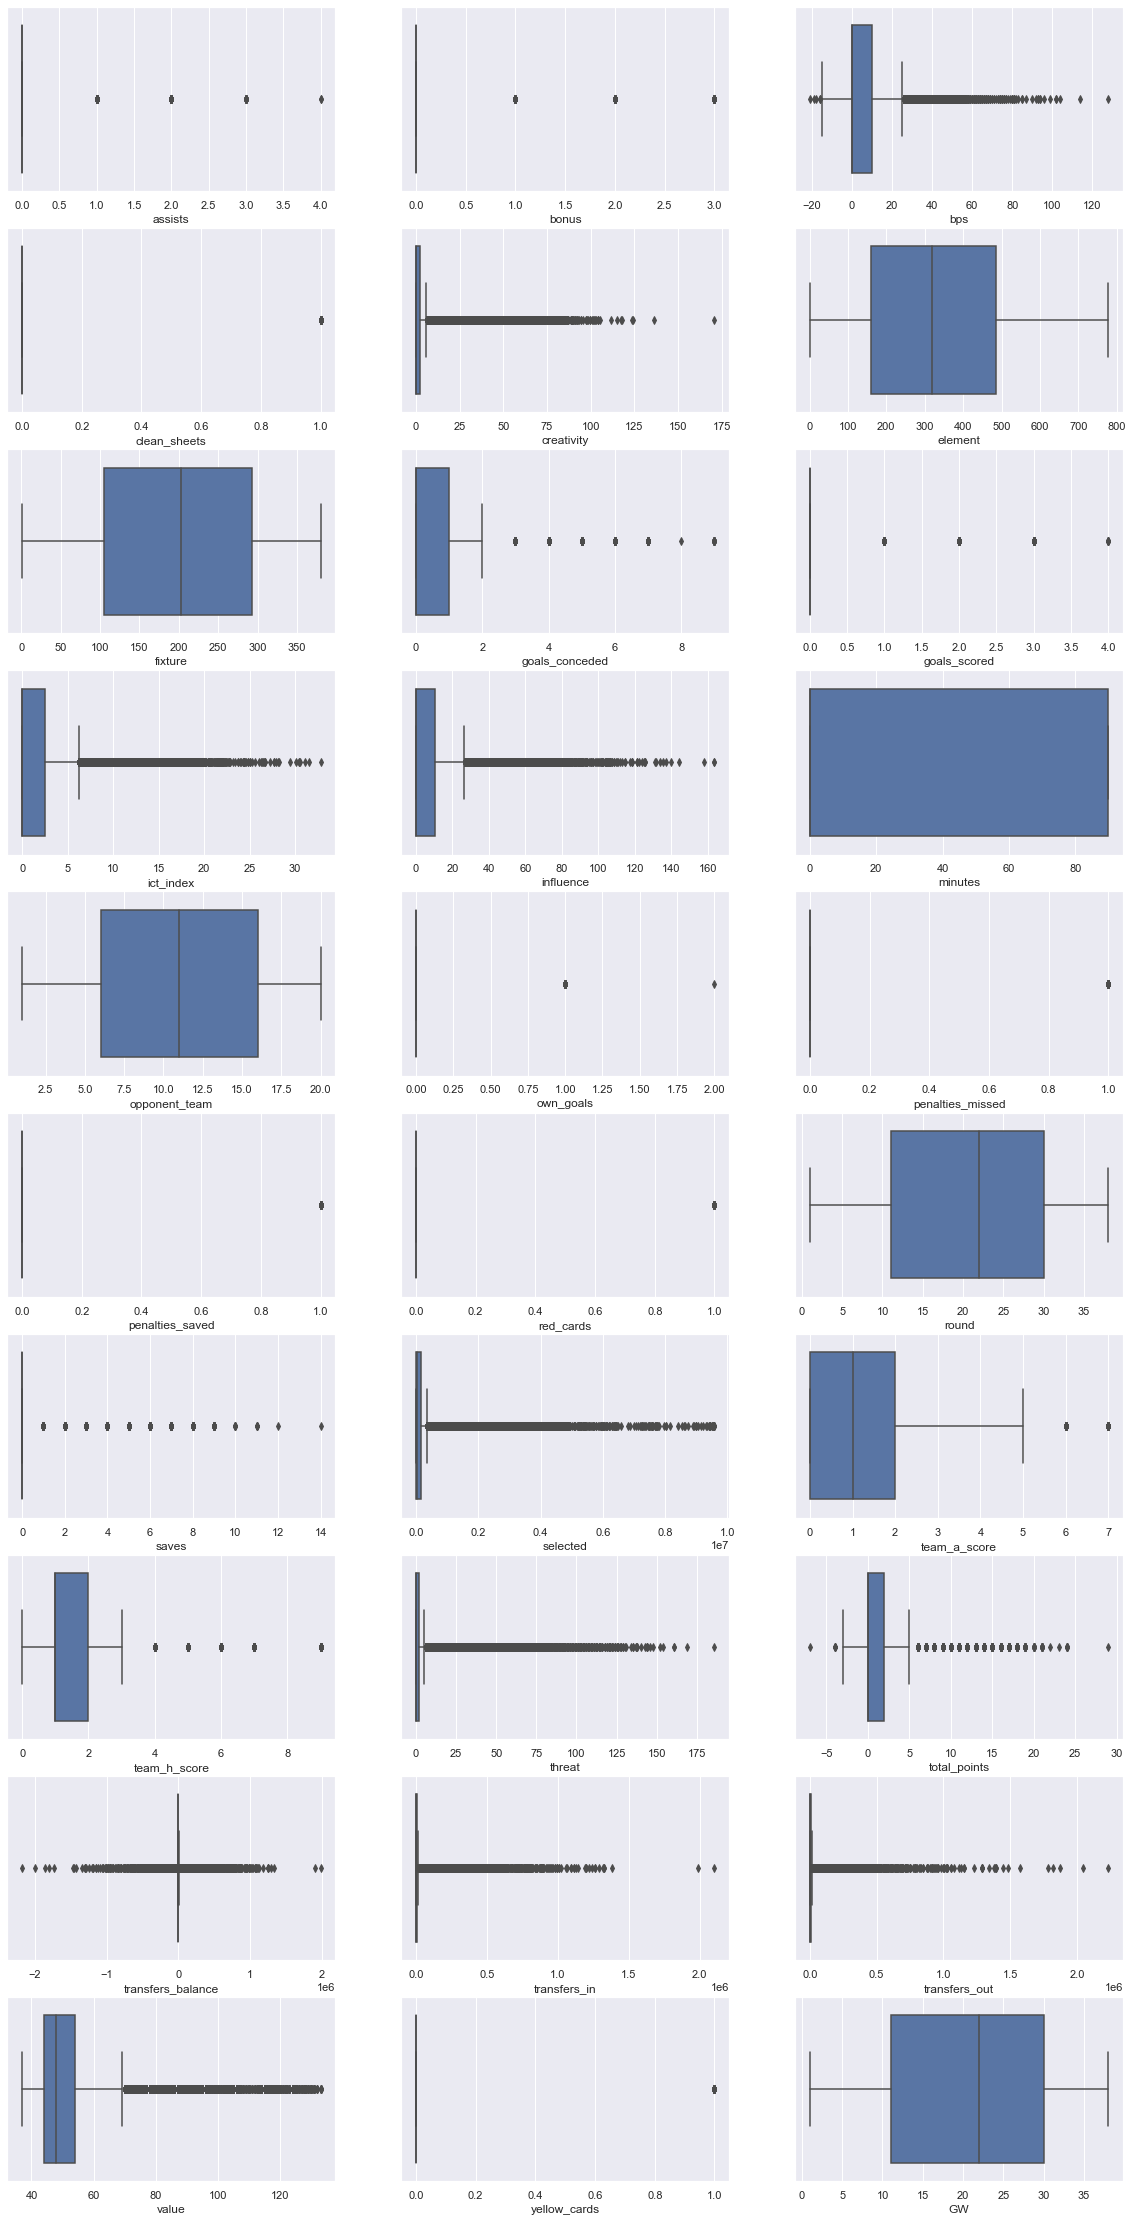

In [152]:
int_float_columns = players.select_dtypes(['int','float']).columns
fig, ax = plt.subplots(10, 3, figsize=(20, 40))

for i in range(10):
    for j in range(3):
        sns.boxplot(data=players, x=int_float_columns[i*3+j], ax=ax[i][j])
        plt.xlabel(int_float_columns[i*3+j])
    i+=1


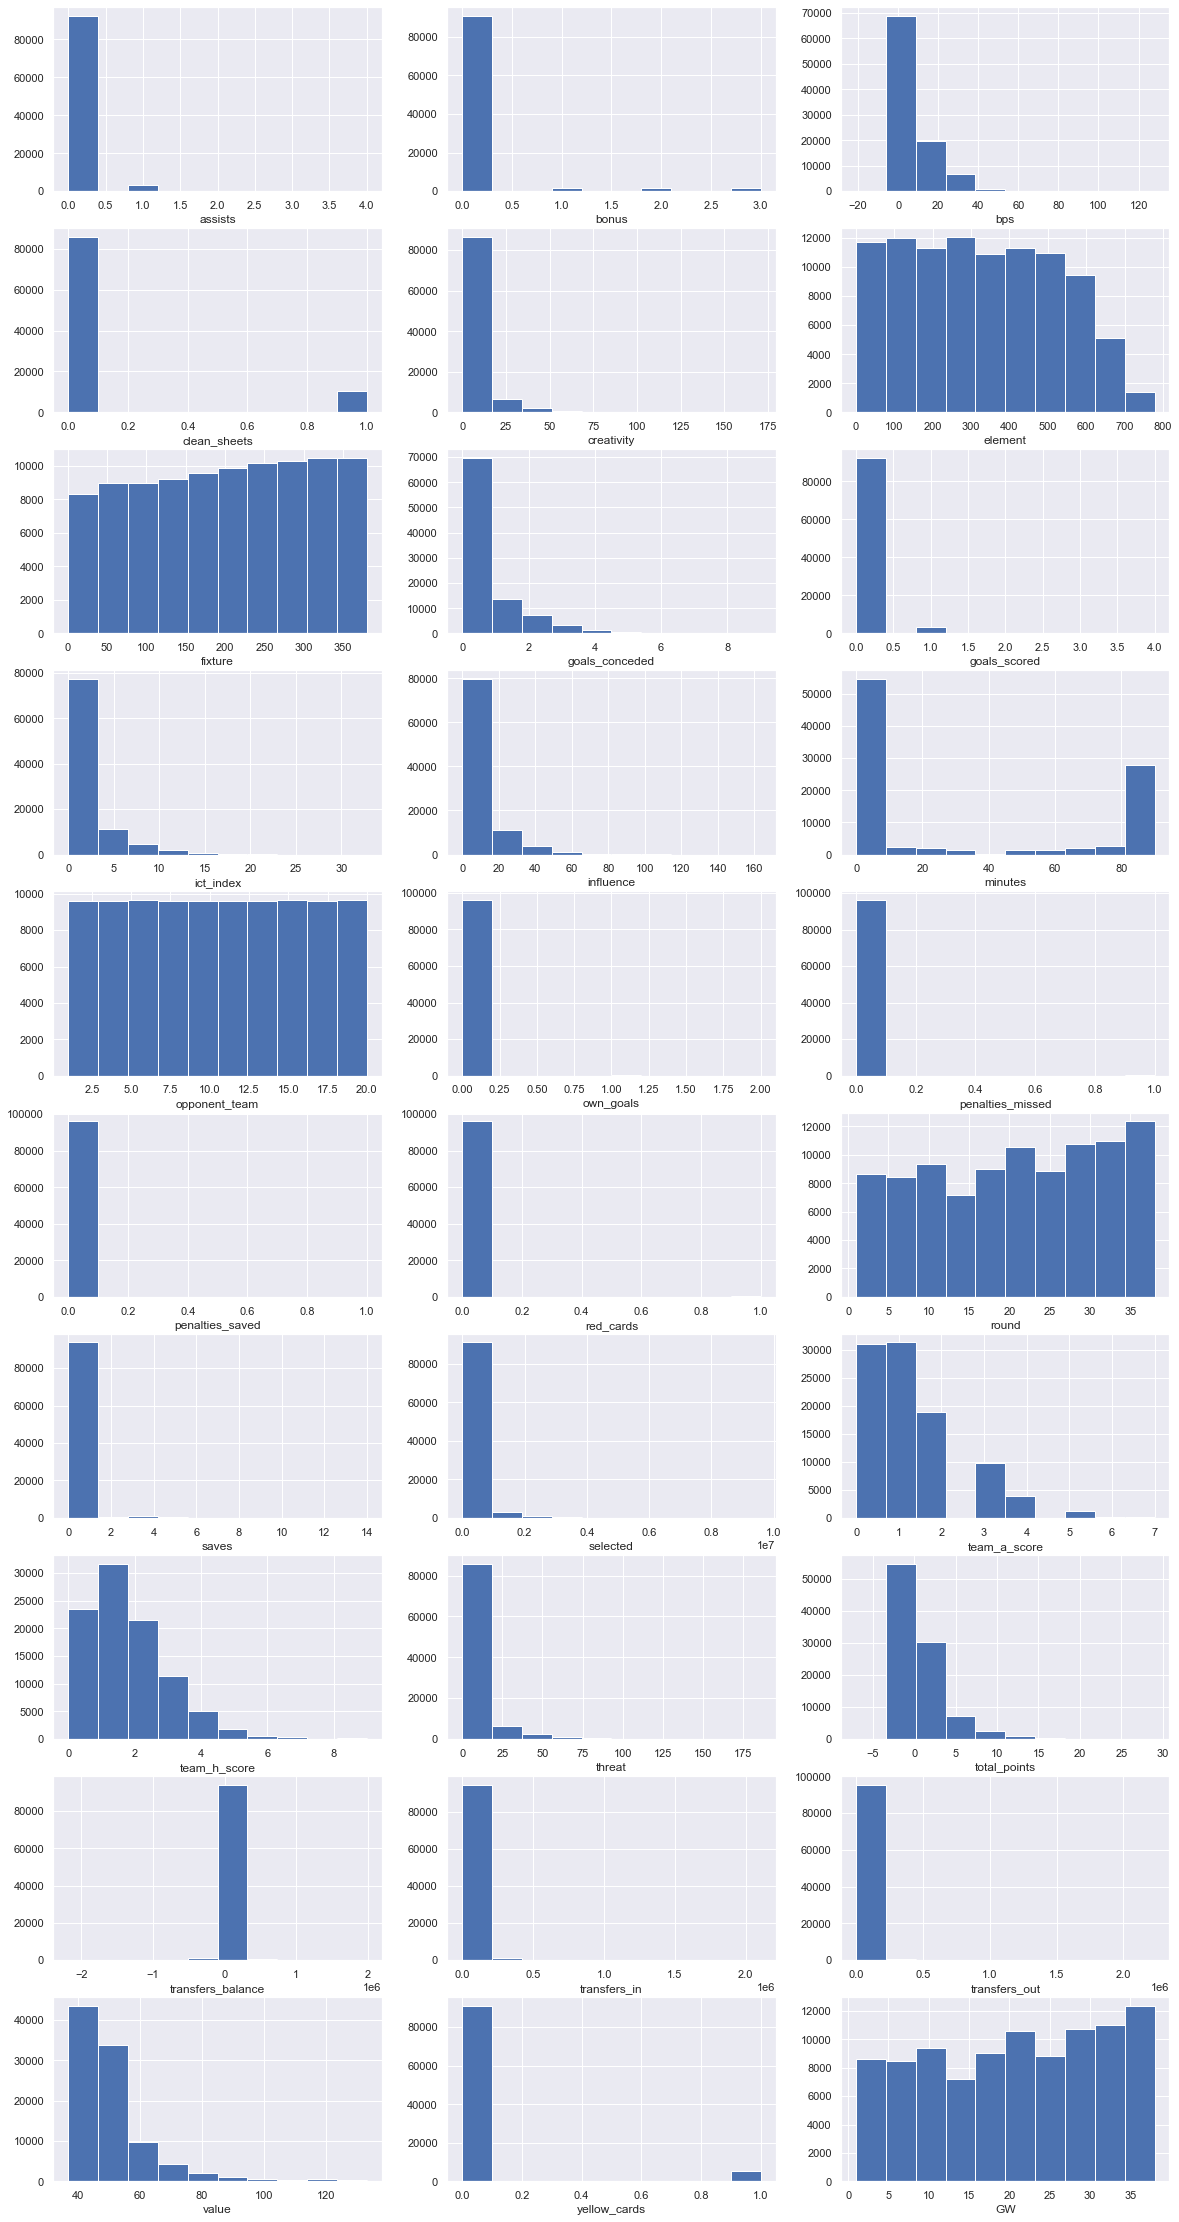

In [156]:
int_float_columns = players.select_dtypes(['int','float']).columns
fig, ax = plt.subplots(10, 3, figsize=(20, 40))

for i in range(10):
    for j in range(3):
        if column_index < len(int_float_columns):
            ax[i, j].hist(data=players, x=int_float_columns[i*3+j])
            ax[i, j].set_xlabel(int_float_columns[i*3+j])



In [ ]:
sns.pairplot(data=players.select_dtypes(include=["int", "float"]))
plt.figure(figsize=(20,40))

In [21]:
players.to_csv('Fantazy_dataset')

In [ ]:
pl